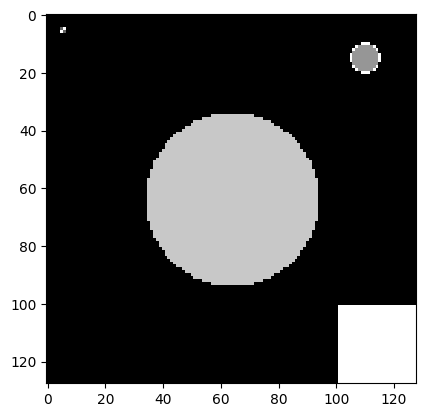

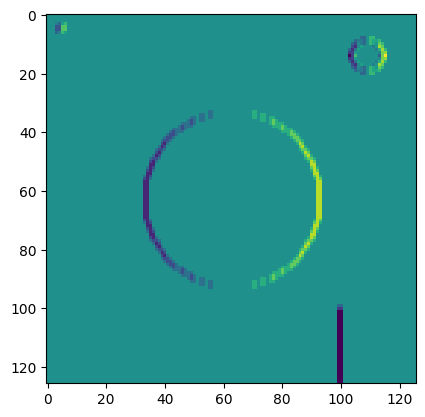

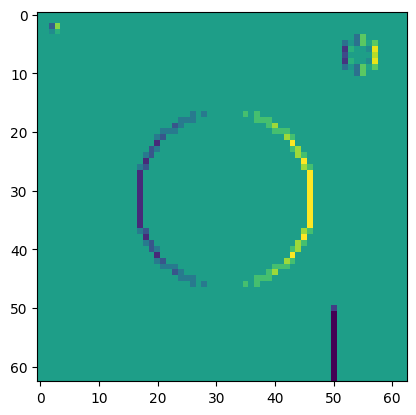

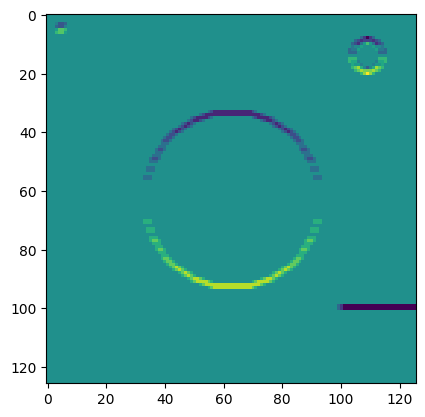

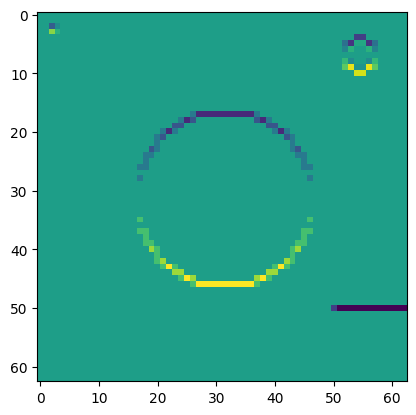

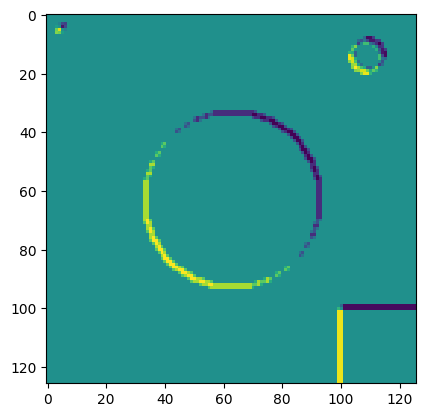

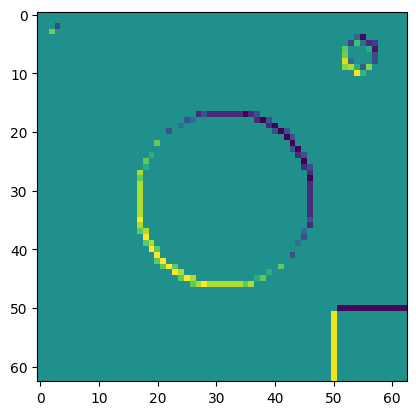

In [1]:
import numpy as np
from matplotlib import pyplot as plt

# function to convolute the image with a given filter and stride
def convolution2D(image, filter, stride=1):
    height, width, channels = image.shape
    filter_size = filter.shape[0]
    output_height = (height - filter_size) // stride + 1
    output_width = (width - filter_size) // stride + 1
    output = np.zeros((output_height, output_width))

    for i in range(0, height - filter_size + 1, stride):
        for j in range(0, width - filter_size + 1, stride):
            for k in range(channels):
                output[i//stride, j//stride] += np.sum(image[i:i+filter_size, j:j+filter_size, k] * filter[:, :])
    return output

# tworzymy tablice o wymiarach 128x128x3 (3 kanaly to RGB)
# uzupelnioną zerami = kolor czarny
data = np.zeros((128, 128, 3), dtype=np.uint8)

# chcemy zeby obrazek byl czarnobialy,
# wiec wszystkie trzy kanaly rgb uzupelniamy tymi samymi liczbami
# napiszmy do tego funkcje
def draw(img, x, y, color):
    img[x, y] = [color, color, color]


# zamalowanie 4 pikseli w lewym górnym rogu
draw(data, 5, 5, 100)
draw(data, 6, 6, 100)
draw(data, 5, 6, 255)
draw(data, 6, 5, 255)


# rysowanie kilku figur na obrazku
for i in range(128):
    for j in range(128):
        if (i-64)**2 + (j-64)**2 < 900:
            draw(data, i, j, 200)
        elif i > 100 and j > 100:
            draw(data, i, j, 255)
        elif (i-15)**2 + (j-110)**2 < 25:
            draw(data, i, j, 150)
        elif (i-15)**2 + (j-110)**2 == 25 or (i-15)**2 + (j-110)**2 == 26:
            draw(data, i, j, 255)

# konwersja macierzy na obrazek i wyświetlenie
plt.imshow(data, interpolation='nearest')
plt.show()

filter1 = np.array([[1, 0, -1],
           [1, 0, -1],
           [1, 0, -1]])

filter2 = np.array([[1, 1, 1],
           [0, 0, 0],
           [-1, -1, -1]])

# filtr 1, stride 1
output = convolution2D(data, filter1, 1)

plt.imshow(output, interpolation='nearest')
plt.show()

# filtr 1, stride 2
output = convolution2D(data, filter1, 2)

plt.imshow(output, interpolation='nearest')
plt.show()

# filtr 2, stride 1
output = convolution2D(data, filter2, 1)

plt.imshow(output, interpolation='nearest')
plt.show()

# filtr 2, stride 2
output = convolution2D(data, filter2, 2)

plt.imshow(output, interpolation='nearest')
plt.show()

sobel = np.array([[0, 1, 2],
                  [-1, 0, 1],
                  [-2, -1, 0]])

# filtr sobel, stride 1
output = convolution2D(data, sobel, 1)

plt.imshow(output, interpolation='nearest')
plt.show()

# filtr sobel, stride 2
output = convolution2D(data, sobel, 2)

plt.imshow(output, interpolation='nearest')
plt.show()